In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel('Flight.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

FEATURES:
    
    
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [11]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [12]:
df["Year_J"]=df['Date_of_Journey'].dt.year
df["Month_J"]=df['Date_of_Journey'].dt.month
df['Day_J']=df['Date_of_Journey'].dt.day


Above, we split the 'Date_of_Journey' column into three different columns, we will drop this column.

In [13]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Year_J',
       'Month_J', 'Day_J'],
      dtype='object')

In [15]:
df.shape

(13354, 13)

So, their are 13354 rows and 13 columns in the dataset.

In [16]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Year_J             0
Month_J            0
Day_J              0
dtype: int64

Their is 1 missing value in two columns, i.e.,'Route' and 'Total_stops'.

In [19]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [20]:
from sklearn.impute import SimpleImputer

In [25]:
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [23]:
imp=SimpleImputer(strategy="most_frequent")

In [24]:
df['Route']=imp.fit_transform(df['Route'].values.reshape(-1,1))

In [26]:
df['Total_Stops']=imp.fit_transform(df['Total_Stops'].values.reshape(-1,1))

In [27]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Year_J             0
Month_J            0
Day_J              0
dtype: int64

Now, their are no missing values in the dataset.

In [29]:
df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [32]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Year_J',
       'Month_J', 'Day_J'],
      dtype='object')

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Price', ylabel='Airline'>

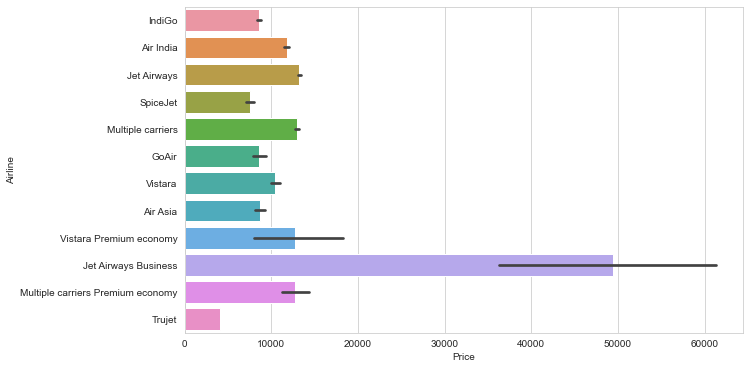

In [36]:
plt.figure(figsize=[10,6])
sns.barplot(x='Price',y='Airline',data=df)

Price rate is Highest for 'Jet Airways Business' aand lowest for 'Trujet'.

<AxesSubplot:xlabel='Price', ylabel='Source'>

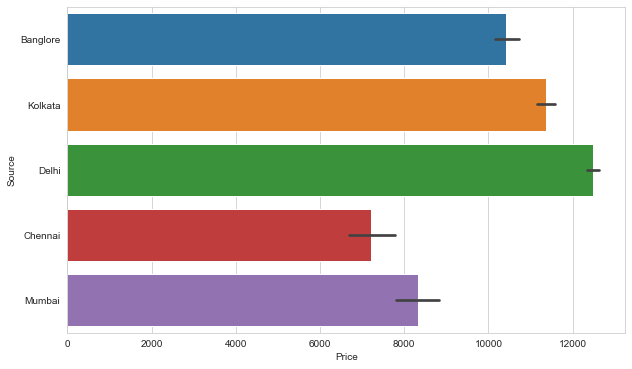

In [38]:
plt.figure(figsize=[10,6])
sns.barplot(x='Price',y='Source',data=df)

Prices are very high when source of beginning is Delhi and prices are lowest when source of beginning is Chennai.

<AxesSubplot:xlabel='Price', ylabel='Destination'>

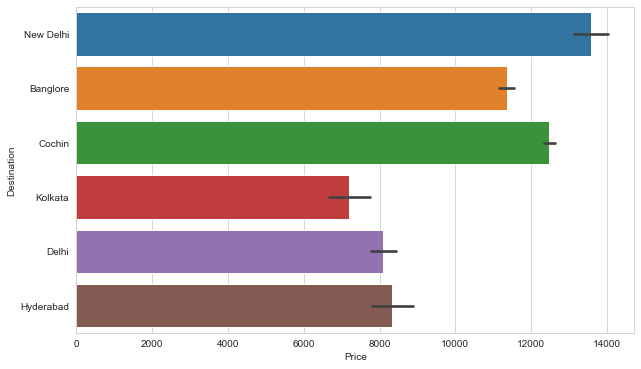

In [39]:
plt.figure(figsize=[10,6])
sns.barplot(x='Price',y='Destination',data=df)

When destination(where service ends), at New Delhi prices are high as compair to other destinations. And it is low when service ends at Kolkatta.

<AxesSubplot:xlabel='Price', ylabel='Total_Stops'>

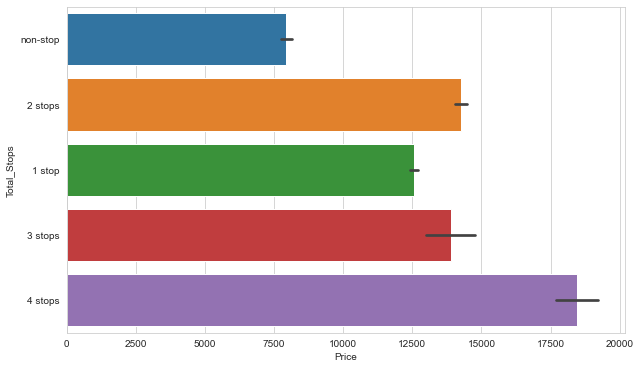

In [41]:
plt.figure(figsize=[10,6])
sns.barplot(x='Price',y='Total_Stops',data=df)

When number of stops are 4, prices are highest and when flight is non-stop, prices are lower as compair to others.

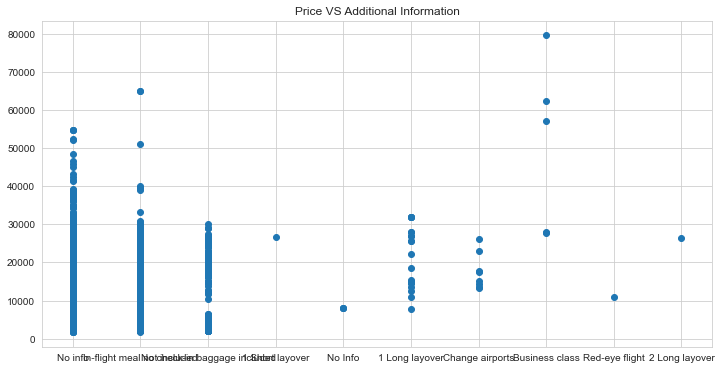

In [45]:
plt.figure(figsize = (12, 6))
plt.title('Price VS Additional Information')
plt.scatter(df['Additional_Info'], df['Price'])

Price rates are highest for Business class.

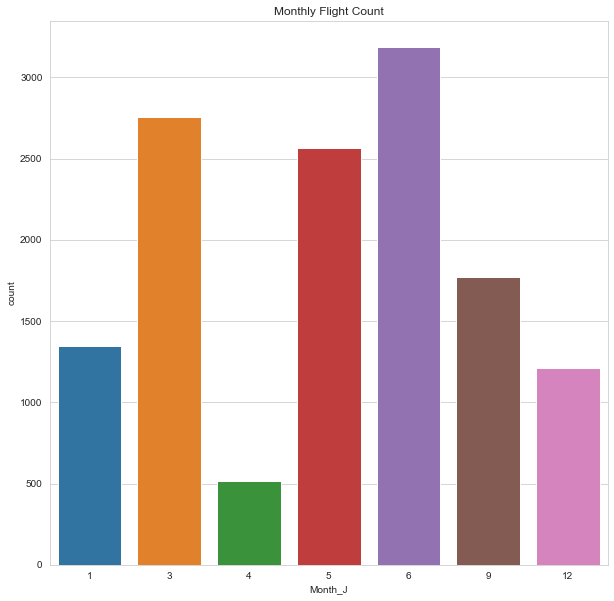

In [46]:
plt.figure(figsize=(10,10))
plt.title("Monthly Flight Count")
sns.countplot(x='Month_J',data=df)
plt.show()

Monthly Flight count for the 6th month is high.

Monthly flight count for the 4th month is less as compair to others.

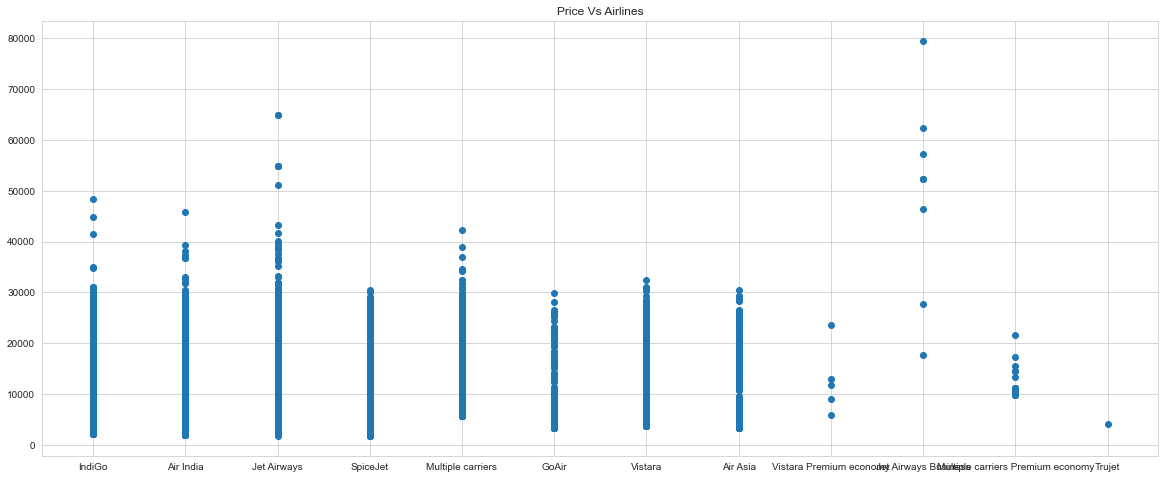

In [51]:
plt.figure(figsize=[20,8])
plt.title("Price Vs Airlines")
plt.scatter(df['Airline'],df['Price'])
plt.show()

Highest Price is for Jet Airways Business(79000)


Lowest price is for Trujet(5000)

<AxesSubplot:title={'center':'Flight Count with different Airlines'}, xlabel='Airline', ylabel='count'>

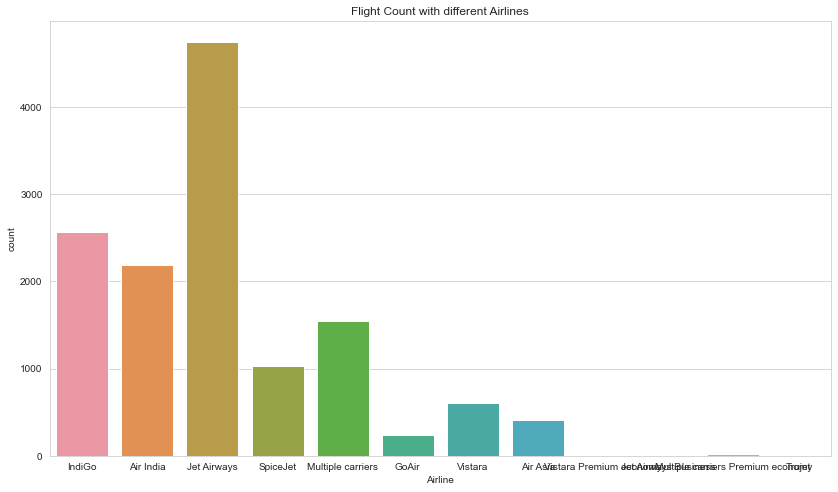

In [55]:
plt.figure(figsize=[14,8])
plt.title("Flight Count with different Airlines")
sns.countplot(x='Airline',data=df)

Fligh Count for Jet Airways is high.

In [58]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [61]:
def convert_into_stops(X):
    if X == '4 stops':
        return 4
    elif X == '3 stops':
        return 3
    elif X == '2 stops':
        return 2
    elif X == '1 stop':
        return 1
    elif X == 'non stop':
        return 0

In [62]:
df['Total_Stops'] = df['Total_Stops'].map(convert_into_stops)

In [63]:
df['Total_Stops'].unique()

array([nan,  2.,  1.,  3.,  4.])

In [64]:
df.fillna(0, inplace  = True)
df['Total_Stops'] = df['Total_Stops'].apply(lambda x : int(x))

In [65]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

For the 'Total_Stops' column, we converted the data into numeric format for further process.

In [66]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int64
Additional_Info    object
Price               int64
Year_J              int64
Month_J             int64
Day_J               int64
dtype: object

In [67]:
def flight_dep_time(X):
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'mid_night'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'

In [72]:
df['flight_time'] = df['Dep_Time'].apply(flight_dep_time)

Text(0, 0.5, 'Count of flights')

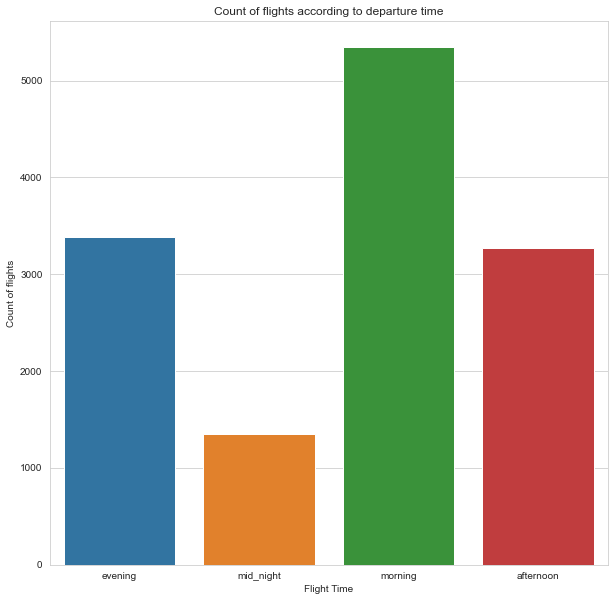

In [73]:

plt.figure(figsize = (10, 10))
plt.title('Count of flights according to departure time')
sns.countplot(x = 'flight_time', data = df)
plt.xlabel('Flight Time')
plt.ylabel('Count of flights')

Most of the flights departure time is in the Morning.

In [74]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Year_J',
       'Month_J', 'Day_J', 'flight_time', 'flight_dep_time'],
      dtype='object')

In [75]:
df['flight_time'].unique()

array(['evening', 'mid_night', 'morning', 'afternoon'], dtype=object)

In [81]:
df.drop('Dep_Time',axis=1,inplace=True)

In [82]:
df.drop('flight_dep_time',axis=1,inplace=True)

dropping the above columns as we already have the data for flight departure time as "flight_time".

We can deop Route column also, as we already have source and destination columns in the dataset.

In [84]:
df.drop('Route',axis=1,inplace=True)

In [85]:
df.head(10)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year_J,Month_J,Day_J,flight_time
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,0,No info,3897,2019,3,24,evening
1,Air India,Kolkata,Banglore,13:15,7h 25m,2,No info,7662,2019,1,5,mid_night
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2,No info,13882,2019,9,6,morning
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1,No info,6218,2019,12,5,evening
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1,No info,13302,2019,1,3,afternoon
5,SpiceJet,Kolkata,Banglore,11:25,2h 25m,0,No info,3873,2019,6,24,morning
6,Jet Airways,Banglore,New Delhi,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087,2019,12,3,evening
7,Jet Airways,Banglore,New Delhi,05:05 02 Mar,21h 5m,1,No info,22270,2019,1,3,morning
8,Jet Airways,Banglore,New Delhi,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087,2019,12,3,morning
9,Multiple carriers,Delhi,Cochin,19:15,7h 50m,1,No info,8625,2019,5,27,morning


We will drop Arrival_time as we already have Duration column.

In [93]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [94]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Year_J', 'Month_J', 'Day_J',
       'flight_time'],
      dtype='object')

In [95]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [99]:
df.drop('Duration',axis=1,inplace=True)

In [100]:
df.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_J,Month_J,Day_J,flight_time
0,IndiGo,Banglore,New Delhi,0,No info,3897,2019,3,24,evening
1,Air India,Kolkata,Banglore,2,No info,7662,2019,1,5,mid_night
2,Jet Airways,Delhi,Cochin,2,No info,13882,2019,9,6,morning
3,IndiGo,Kolkata,Banglore,1,No info,6218,2019,12,5,evening
4,IndiGo,Banglore,New Delhi,1,No info,13302,2019,1,3,afternoon
5,SpiceJet,Kolkata,Banglore,0,No info,3873,2019,6,24,morning
6,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,11087,2019,12,3,evening
7,Jet Airways,Banglore,New Delhi,1,No info,22270,2019,1,3,morning
8,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,11087,2019,12,3,morning
9,Multiple carriers,Delhi,Cochin,1,No info,8625,2019,5,27,morning


Statitical Summary

In [101]:
df.describe()

,Total_Stops,Price,Year_J,Month_J,Day_J
count,13354.000000,13354.000000,13354.0,13354.000000,13354.000000
mean,0.826045,11301.720009,2019.0,5.549274,12.551146
std,0.674608,6452.843082,0.0,2.998690,8.759967
min,0.000000,1759.000000,2019.0,1.000000,3.000000
25%,0.000000,6135.250000,2019.0,3.000000,5.000000
50%,1.000000,10262.000000,2019.0,5.000000,6.000000
75%,1.000000,14781.000000,2019.0,6.000000,21.000000
max,4.000000,79512.000000,2019.0,12.000000,27.000000


As other columns are of Obj data type, we did not get the statistical summary for those columns.

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
le=LabelEncoder()

In [104]:
df.dtypes

Airline            object
Source             object
Destination        object
Total_Stops         int64
Additional_Info    object
Price               int64
Year_J              int64
Month_J             int64
Day_J               int64
flight_time        object
dtype: object

In [107]:
list=['Airline','Source','Destination','Additional_Info','flight_time']

In [109]:
for val in list:
    df[val]=le.fit_transform(df[val])

In [110]:
df.dtypes

Airline            int64
Source             int64
Destination        int64
Total_Stops        int64
Additional_Info    int64
Price              int64
Year_J             int64
Month_J            int64
Day_J              int64
flight_time        int64
dtype: object

As all the data encoded, we can proceed with further steps.

Outlier Check

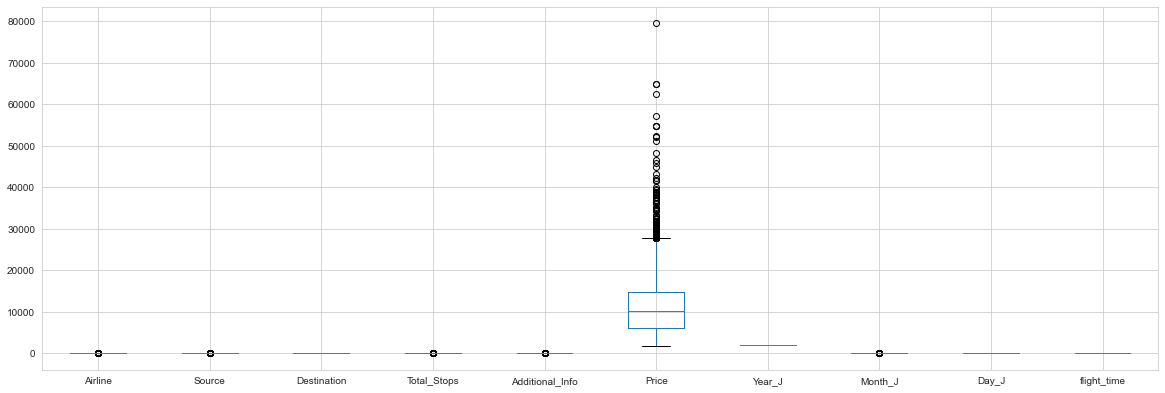

In [111]:
df.iloc[:,0:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

<AxesSubplot:>

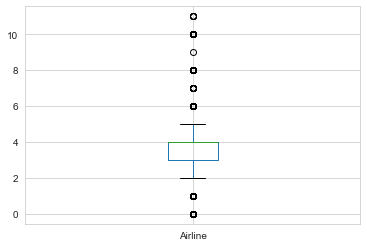

In [112]:
df['Airline'].plot.box()

<AxesSubplot:>

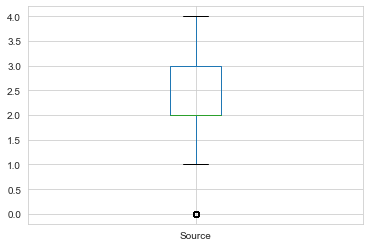

In [113]:
df['Source'].plot.box()

<AxesSubplot:>

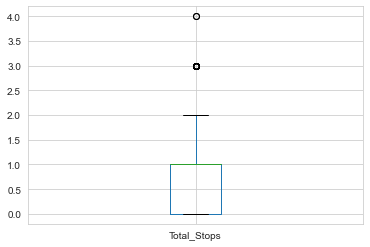

In [114]:
df['Total_Stops'].plot.box()

<AxesSubplot:>

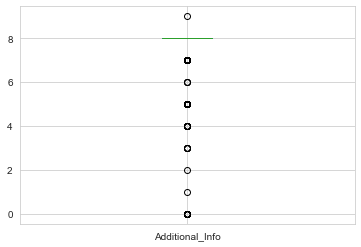

In [115]:
df['Additional_Info'].plot.box()

<AxesSubplot:>

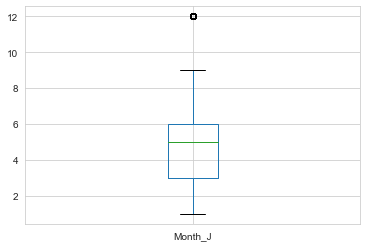

In [117]:
df['Month_J'].plot.box()

Outliers are there in Multiple columns.

In [118]:
from scipy.stats import zscore

In [119]:
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  396,   402,   657,   785,   919,  1043,  1218,  1478,  1629,
        1665,  2079,  2099,  2172,  2405,  2481,  2495,  2556,  2618,
        2623,  2633,  2693,  2718,  2814,  2822,  2924,  2924,  3032,
        3111,  3157,  3220,  3317,  3496,  3568,  3584,  3700,  3700,
        3788,  3815,  3945,  4118,  4463,  4521,  4655,  4760,  5013,
        5013,  5050,  5372,  5372,  5439,  5446,  5628,  5662,  5719,
        5838,  5947,  5996,  6024,  6336,  6444,  6576,  6576,  6599,
        6884,  6991,  7001,  7031,  7249,  7351,  7586,  7617,  7724,
        7752,  7876,  8153,  8204,  8598,  8601,  8729,  8957,  9019,
        9019,  9029,  9182,  9454,  9484,  9569,  9657,  9715, 10052,
       10364, 10364, 10439, 10511, 10639, 10755, 10796, 10810, 10927,
       10934, 10939, 10964, 11022, 11027, 11107, 11157, 11167, 11188,
       11262, 11347, 11356, 11363, 11408, 11418, 11488, 11513, 11558,
       11560, 11580, 11637, 11929, 11968, 12011, 12103, 12120, 12168,
       12173, 12191

In [120]:
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_J,Month_J,Day_J,flight_time


In [121]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_J,Month_J,Day_J,flight_time
0,3,0,5,0,8,3897,2019,3,24,1
1,1,3,0,2,8,7662,2019,1,5,2
2,4,2,1,2,8,13882,2019,9,6,3
3,3,3,0,1,8,6218,2019,12,5,1
4,3,0,5,1,8,13302,2019,1,3,0
...,...,...,...,...,...,...,...,...,...,...
13349,1,3,0,1,8,14046,2019,6,6,1
13350,3,3,0,0,8,14086,2019,3,27,0
13351,4,2,1,1,8,22720,2019,6,3,1
13352,1,2,1,1,8,23544,2019,6,3,2


We are not going to remove outliers as most of the columns are of obj data type.

In [123]:
df_cor=df.corr()
df_cor

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_J,Month_J,Day_J,flight_time
Airline,1.000000,-0.018547,0.022130,-0.206350,-0.058533,-0.016809,NaN,-0.005482,0.025635,0.055542
Source,-0.018547,1.000000,-0.589710,0.191144,-0.022219,0.016235,NaN,0.060574,0.000833,-0.093691
Destination,0.022130,-0.589710,1.000000,-0.294183,0.027398,-0.043160,NaN,-0.104465,-0.046308,0.072480
Total_Stops,-0.206350,0.191144,-0.294183,1.000000,-0.079092,0.353115,NaN,0.068745,-0.027965,0.024783
Additional_Info,-0.058533,-0.022219,0.027398,-0.079092,1.000000,-0.019336,NaN,-0.008769,-0.020467,0.032061
Price,-0.016809,0.016235,-0.043160,0.353115,-0.019336,1.000000,NaN,0.014613,-0.119280,-0.005954
Year_J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month_J,-0.005482,0.060574,-0.104465,0.068745,-0.008769,0.014613,NaN,1.000000,-0.263645,-0.011174
Day_J,0.025635,0.000833,-0.046308,-0.027965,-0.020467,-0.119280,NaN,-0.263645,1.000000,0.001518
flight_time,0.055542,-0.093691,0.072480,0.024783,0.032061,-0.005954,NaN,-0.011174,0.001518,1.000000


AsYear column has common value, i.e., 2019, that is the reason, correlation is coming as NaN.

<AxesSubplot:>

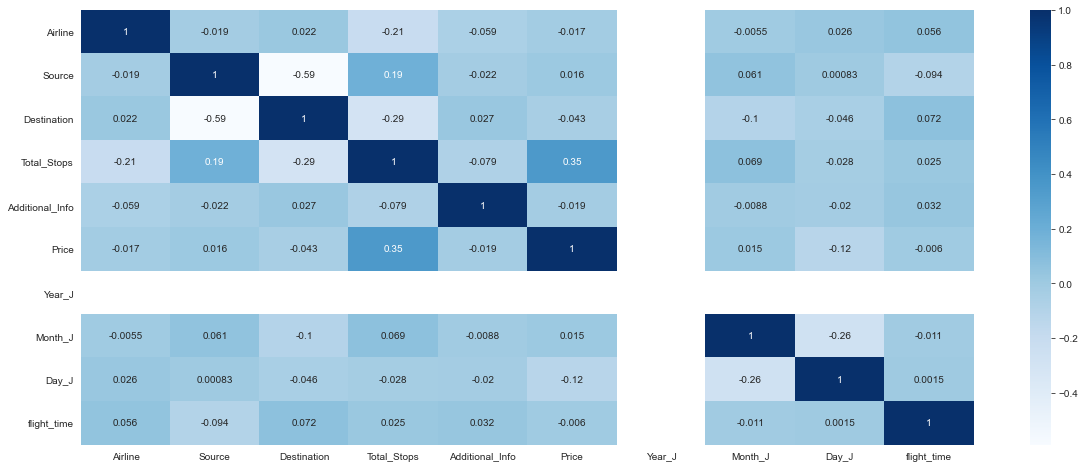

In [124]:
plt.figure(figsize=[20,8])
sns.heatmap(df_cor,cmap='Blues',annot=True)

In [125]:
corr_matrix=df.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price              1.000000
Total_Stops        0.353115
Source             0.016235
Month_J            0.014613
flight_time       -0.005954
Airline           -0.016809
Additional_Info   -0.019336
Destination       -0.043160
Day_J             -0.119280
Year_J                  NaN
Name: Price, dtype: float64

Highest correlation with Price - Total_Stops(0.353)


Lowest Correlation with Price -  Day_J(-0.119)

spliting the dataset into independent and dependent variables.

In [126]:
x=df.drop('Price',axis=1)
y=df['Price']

In [127]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,Year_J,Month_J,Day_J,flight_time
0,3,0,5,0,8,2019,3,24,1
1,1,3,0,2,8,2019,1,5,2
2,4,2,1,2,8,2019,9,6,3
3,3,3,0,1,8,2019,12,5,1
4,3,0,5,1,8,2019,1,3,0
...,...,...,...,...,...,...,...,...,...
13349,1,3,0,1,8,2019,6,6,1
13350,3,3,0,0,8,2019,3,27,0
13351,4,2,1,1,8,2019,6,3,1
13352,1,2,1,1,8,2019,6,3,2


In [128]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
13349    14046
13350    14086
13351    22720
13352    23544
13353    27489
Name: Price, Length: 13354, dtype: int64

skewness check

In [129]:
x.skew()

Airline            0.720924
Source            -0.424151
Destination        1.247893
Total_Stops        0.317797
Additional_Info   -1.784752
Year_J             0.000000
Month_J            0.621749
Day_J              0.389526
flight_time       -0.112781
dtype: float64

Here we are not going to remove skewness as most columns are of Obj data type.

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
sc=StandardScaler()

In [132]:
X=sc.fit_transform(x)

Data is Scaled

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error



In [134]:
#finding best random_state
maxr2_score=0
maxRs=0
for i in range(1,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(X_train,y_train)
    pred=LR.predict(X_test)
    r_2=r2_score(y_test,pred)
    if r_2>maxr2_score:
    
        maxr2_score=r_2
        maxRs=i
        
print("Best r2_score is", maxr2_score,"on Random state", maxRs)    

Best r2_score is 0.17135498927164372 on Random state 73


In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=73)

In [136]:
LR=LinearRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_test)
print(r2_score(y_test,pred))

print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.17135498927164372
33461480.166234773
Root mean squared Error: 5784.589887471261


In [137]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

-0.14091567855777054
46071269.186609626
Root mean squared Error: 6787.581983785509


In [138]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.11779024836498397
35624475.77020548
Root mean squared Error: 5968.624277855449


In [139]:
svr=SVR()
svr.fit(X_train,y_train)
pred=svr.predict(X_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

-0.008254489443837443
40714283.15411883
Root mean squared Error: 6380.77449484926


As we got less RMSE for LinearRegression, we will save this model.

In [140]:
import joblib

In [141]:
joblib.dump(LR,"Flight_Price.pkl")

['Flight_Price.pkl']

In [143]:
Model_Flight=joblib.load("Flight_Price.pkl")